In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
Bike = pd.read_csv(r'C:\Users\vedachakravarthula\Downloads\day(1).csv')

In [3]:
print(Bike.head())
print(Bike.shape)

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2018       1   0     1        0        6           0   
1        2  2/1/2018       1   0     1        0        0           0   
2        3  3/1/2018       1   0     1        0        1           1   
3        4  4/1/2018       1   0     1        0        2           1   
4        5  5/1/2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
(730, 16)


In [4]:
### To get the Shape of the data
Bike.shape

(730, 16)

# To get the basic information of the data for analysis

###Instant here is Index
### Date refers to day wise informaion about data spread accross 2 years 2018 and 2019
### Season , yr , month , Holiday , weekday  , Workingdat and weathersit are categorical  variables where we need to identify,define  which are required and which are required to be dropped 
### temp , atemp ,hum , windspeed are continous variables
### casual and registered and cont are target , where we see cont is sum of casual + registered and cont can be considered as Target variable and drop the others.

# Drawing thee plots and analysis  of data

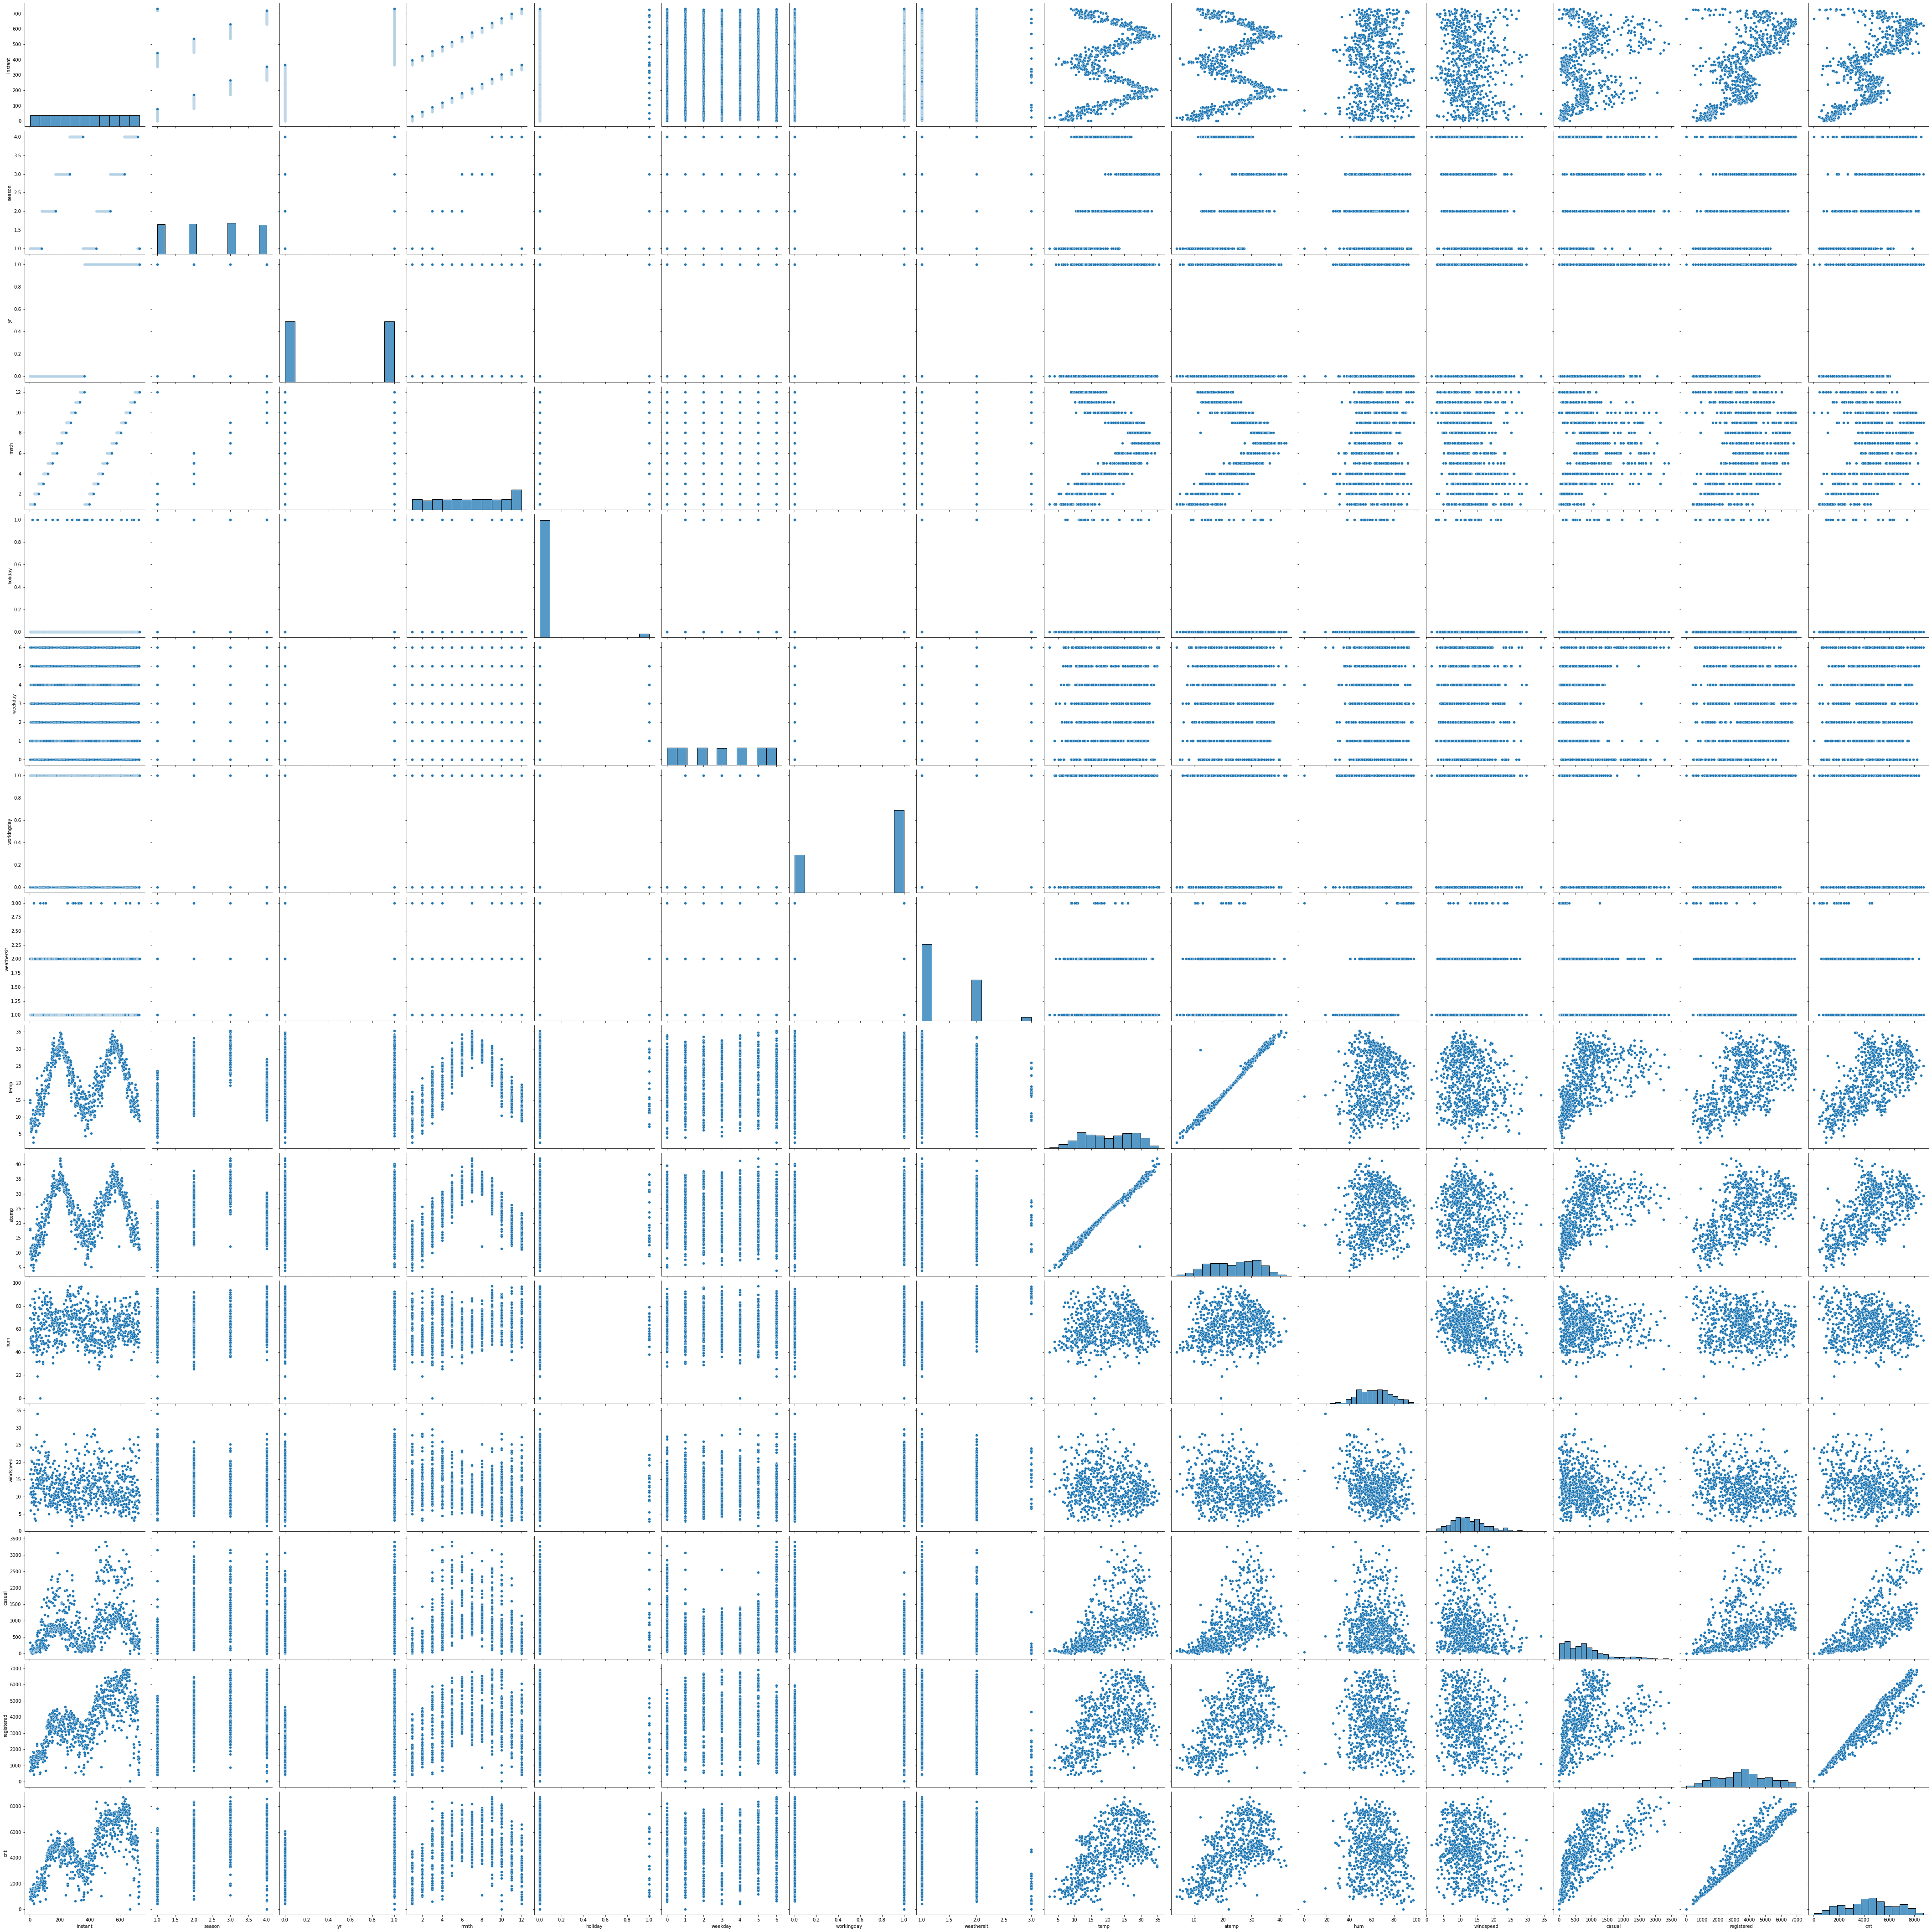

In [5]:
sns.pairplot(Bike,height = 4,aspect =1,kind ='scatter')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

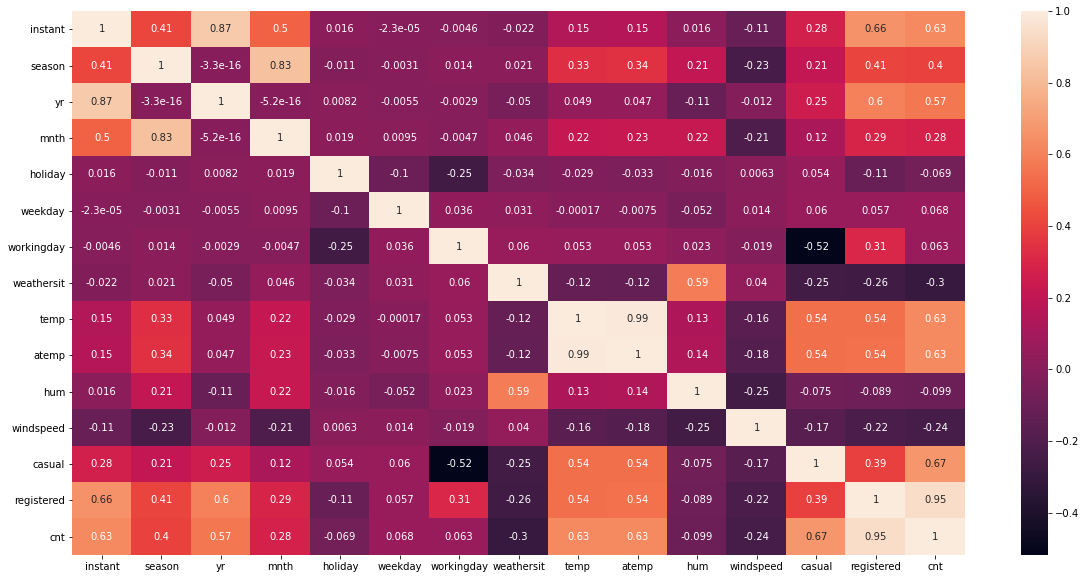

In [6]:
### Correlation of variables
plt.figure(figsize = (20,10))
sns.heatmap(Bike.corr(),annot =True)
plt.show

### Data inference
#Correlatin between Cont & Season is high and Cont and Yr is high and also Cont & Temp is also hig
## temp and atemp are multi colleanearity and we can drop one variable
## We can drop the  variables which are collinearity

In [5]:
# Dropping the variables instant , Dtedat,temp, casual, registered and considering required variables only
###Bike.head()
Bike1 = Bike[['season','yr','mnth','holiday','weekday','workingday','weathersit','atemp','hum','windspeed','cnt']]



In [6]:
##season (1:spring, 2:summer, 3:fall, 4:winter)

##Bike1.head()
Bike1['season'] = Bike1['season'].apply(lambda x: "Spring" if (x==1) else x)
Bike1['season'] = Bike1['season'].apply(lambda x: "summer" if (x==2) else x)
Bike1['season'] = Bike1['season'].apply(lambda x: "fall" if (x==3) else x)
Bike1['season'] = Bike1['season'].apply(lambda x: "winter" if (x==4) else x)

In [7]:
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "January" if (x==1) else x)
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "February" if (x==2) else x)
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "March" if (x==3) else x)
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "April" if (x==4) else x)
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "May" if (x==5) else x)
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "June" if (x==6) else x)
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "July" if (x==7) else x)
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "August" if (x==8) else x)
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "September" if (x==9) else x)
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "october" if (x==10) else x)
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "November" if (x==11) else x)
Bike1['mnth'] = Bike1['mnth'].apply(lambda x: "December" if (x==12) else x)

In [8]:
Bike1.mnth.value_counts()

May          62
october      62
January      62
August       62
December     62
July         62
March        62
April        60
November     60
September    60
June         60
February     56
Name: mnth, dtype: int64

In [9]:
###Bike.head()
### WeatherSit
###Clear, Few clouds, Partly cloudy, Partly cloudy
    ##2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
###Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
### Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Bike1['weathersit'] = Bike1['weathersit'].apply(lambda x: "Sunny" if (x==1) else x)
Bike1['weathersit'] = Bike1['weathersit'].apply(lambda x: "Cloudy" if (x==2) else x)
Bike1['weathersit'] = Bike1['weathersit'].apply(lambda x: "Windy" if (x==3) else x)
Bike1['weathersit'] = Bike1['weathersit'].apply(lambda x: "Rainy" if (x==4) else x)

In [10]:
Bike1 = Bike1.drop("workingday",axis =1)

In [11]:
##Bike1.head()
##Bike1['weekday'] = Bike1['weathersit'].apply(lambda x: "Weekend" if x in (6,7) else "Weekday")
Bike1['weekday'] = Bike1['weekday'].apply(lambda x: "Saturday" if (x==6) else x)
Bike1['weekday'] = Bike1['weekday'].apply(lambda x: "Sunday" if (x==0) else x)
Bike1['weekday'] = Bike1['weekday'].apply(lambda x: "Monday" if (x==1) else x)
Bike1['weekday'] = Bike1['weekday'].apply(lambda x: "Tuesday" if (x==2) else x)
Bike1['weekday'] = Bike1['weekday'].apply(lambda x: "Wednesday" if (x==3) else x)
Bike1['weekday'] = Bike1['weekday'].apply(lambda x: "Thursday" if (x==4) else x)
Bike1['weekday'] = Bike1['weekday'].apply(lambda x: "Friday" if (x==5) else x)

In [12]:
Bike1.head()

,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,Sunny,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,Sunny,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,Sunny,11.46350,43.6957,12.522300,1600


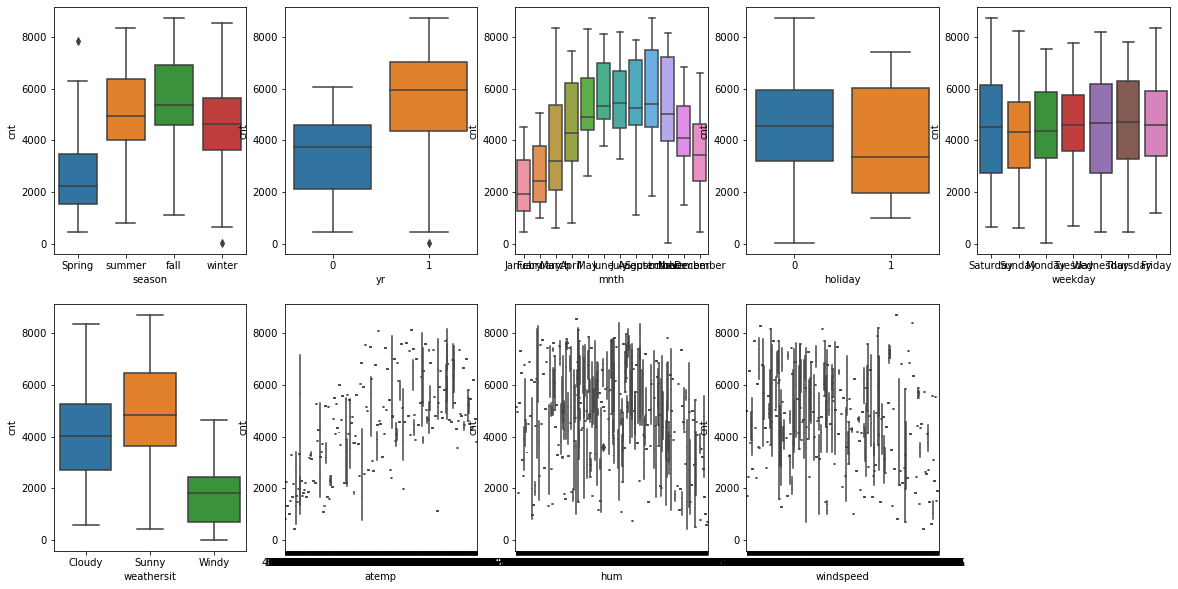

In [18]:
plt.figure(figsize = (20,10))
plt.subplot(2,5,1)
sns.boxplot(x = 'season',y = 'cnt',data = Bike1)
plt.subplot(2,5,2)
sns.boxplot(x = 'yr',y = 'cnt',data = Bike1)
plt.subplot(2,5,3)
sns.boxplot(x = 'mnth',y = 'cnt',data = Bike1)
plt.subplot(2,5,4)
sns.boxplot(x = 'holiday',y = 'cnt',data = Bike1)
plt.subplot(2,5,5)
sns.boxplot(x = 'weekday',y = 'cnt',data = Bike1)
plt.subplot(2,5,6)
sns.boxplot(x = 'weathersit',y = 'cnt',data = Bike1)
plt.subplot(2,5,7)
sns.boxplot(x = 'atemp',y = 'cnt',data = Bike1)
plt.subplot(2,5,8)
sns.boxplot(x = 'hum',y = 'cnt',data = Bike1)
plt.subplot(2,5,9)
sns.boxplot(x = 'windspeed',y = 'cnt',data = Bike1)
plt.show()

In [ ]:
###Bike1.head()


In [13]:
##status = pd.get_dummies(Bike1['season'])
###status.head()
## Season , month, #weekday and Weathersit

,Spring,fall,summer,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
Bike1.head()
# Split the data as Week Day and Non Week Days
###varlist1 = ['weekday']
###def binary_map(x):
###    return x.map({(1,2,3,4,5):'Weekday',(6,7):'Weekend'})
###Bike1[varlist1] = Bike1[varlist1].apply(binary_map)
####Bike1[varlist1] = (lambda x:x.map({(1,2,3,4,5):'Weekday',(6,7):'Weekend'}),Bike1[varlist1])
####Bike1['weekday'] = Bike1['weekday'].apply(lambda x :'Weekend' if x in (6,7) else 'Weekday')
##Bike1[varlist1].apply(binary_map)

In [13]:
###status1 = pd.get_dummies(Bike1['weekday'])
status1 = pd.get_dummies(Bike1['season'],drop_first = True)
status1.head()

,fall,summer,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [14]:
##Bike1.shape
###status1.shape
##Bike1 = pd.concat([Bike1,status1]),axis =1)
Bike1 = pd.concat([Bike1,status1],axis = 1)
###Bike1.head()

In [15]:
Bike1.head()

,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,cnt,fall,summer,winter
0,Spring,0,January,0,Saturday,Cloudy,18.18125,80.5833,10.749882,985,0,0,0
1,Spring,0,January,0,Sunday,Cloudy,17.68695,69.6087,16.652113,801,0,0,0
2,Spring,0,January,0,Monday,Sunny,9.47025,43.7273,16.636703,1349,0,0,0
3,Spring,0,January,0,Tuesday,Sunny,10.60610,59.0435,10.739832,1562,0,0,0
4,Spring,0,January,0,Wednesday,Sunny,11.46350,43.6957,12.522300,1600,0,0,0


In [15]:
status2 = pd.get_dummies(Bike1['mnth'],drop_first = True)
##status2.head()

In [16]:
Bike1 = pd.concat([Bike1,status2],axis = 1)
###Bike1.head()
## Season done
## Month Done

In [17]:
##Bike1.info()
Bike1 = Bike1.drop("season",axis = 1)


In [18]:
Bike1 = Bike1.drop("mnth",axis = 1)

In [19]:
##Bike1.weekday.value_counts()
status3 = pd.get_dummies(Bike1['weekday'],drop_first = True)


In [20]:
Bike1 = pd.concat([Bike1,status3],axis = 1)


In [21]:
##Bike1.info()
Bike1.drop("weekday",axis = 1)
##status3.head()

,yr,holiday,weathersit,atemp,hum,windspeed,cnt,fall,summer,winter,...,May,November,September,october,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Cloudy,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Cloudy,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,Sunny,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Sunny,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,Sunny,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,Cloudy,11.33210,65.2917,23.458911,2114,0,0,0,...,0,0,0,0,0,0,0,1,0,0
726,1,0,Cloudy,12.75230,59.0000,10.416557,3095,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,1,0,Cloudy,12.12000,75.2917,8.333661,1341,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,Sunny,11.58500,48.3333,23.500518,1796,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
###Bike1 = Bike1.drop('Sunny',axis = 1)

###status4 = pd.get_dummies(Bike1['weathersit'],drop_first = True)
###Bike1 = pd.concat([Bike1,status4],axis = 1)
####Bike1.info()


KeyError: "['Sunny'] not found in axis"

In [45]:
###Bike1 = Bike1.drop('Windy',axis = 1)

In [18]:
Bike1.head()

,yr,holiday,weekday,weathersit,atemp,hum,windspeed,cnt,fall,summer,...,May,November,September,october,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Saturday,Cloudy,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Sunday,Cloudy,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,Monday,Sunny,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Tuesday,Sunny,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,Wednesday,Sunny,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
Bike1 = Bike1.drop("weekday",axis = 1)

In [23]:
status5 = pd.get_dummies(Bike1['weathersit'])

In [24]:
status5.head()

,Cloudy,Sunny,Windy
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [25]:
Bike1 = pd.concat([Bike1,status5],axis = 1)

In [26]:
Bike1 = Bike1.drop('weathersit',axis = 1)

In [27]:
Bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         730 non-null    int64  
 1   holiday    730 non-null    int64  
 2   atemp      730 non-null    float64
 3   hum        730 non-null    float64
 4   windspeed  730 non-null    float64
 5   cnt        730 non-null    int64  
 6   fall       730 non-null    uint8  
 7   summer     730 non-null    uint8  
 8   winter     730 non-null    uint8  
 9   August     730 non-null    uint8  
 10  December   730 non-null    uint8  
 11  February   730 non-null    uint8  
 12  January    730 non-null    uint8  
 13  July       730 non-null    uint8  
 14  June       730 non-null    uint8  
 15  March      730 non-null    uint8  
 16  May        730 non-null    uint8  
 17  November   730 non-null    uint8  
 18  September  730 non-null    uint8  
 19  october    730 non-null    uint8  
 20  Monday    

In [28]:
# Training and Test data spliting  using 
Bike1_Train,Bike1_test = train_test_split(Bike1,train_size = 0.7,test_size = 0.3,random_state =100)

In [29]:
print(Bike1_Train.shape)
print(Bike1_test.shape)

(510, 29)
(219, 29)


In [30]:
Bike1.head()

,yr,holiday,atemp,hum,windspeed,cnt,fall,summer,winter,August,...,october,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Sunny,Windy
0,0,0,18.18125,80.5833,10.749882,985,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,17.68695,69.6087,16.652113,801,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,9.47025,43.7273,16.636703,1349,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,10.60610,59.0435,10.739832,1562,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,11.46350,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [31]:
## Scaling up the features to equal units
###Bike1_Train.head()
scaler=MinMaxScaler(feature_range=(0,1))
num_variables = ['atemp','hum','windspeed','cnt']
Bike1_Train[num_variables] = scaler.fit_transform(Bike1_Train[num_variables])
Bike1_Train

,yr,holiday,atemp,hum,windspeed,cnt,fall,summer,winter,August,...,october,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Sunny,Windy
653,1,0,0.501133,0.575354,0.300794,0.864243,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
576,1,0,0.766351,0.725633,0.264686,0.827658,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0.438975,0.640189,0.255342,0.465255,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0.200348,0.498067,0.663106,0.204096,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.762183,0.605840,0.355596,0.764151,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
578,1,0,0.824359,0.679690,0.187140,0.832835,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
53,0,0,0.218747,0.435939,0.111379,0.218017,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
350,0,0,0.223544,0.577930,0.431816,0.312586,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


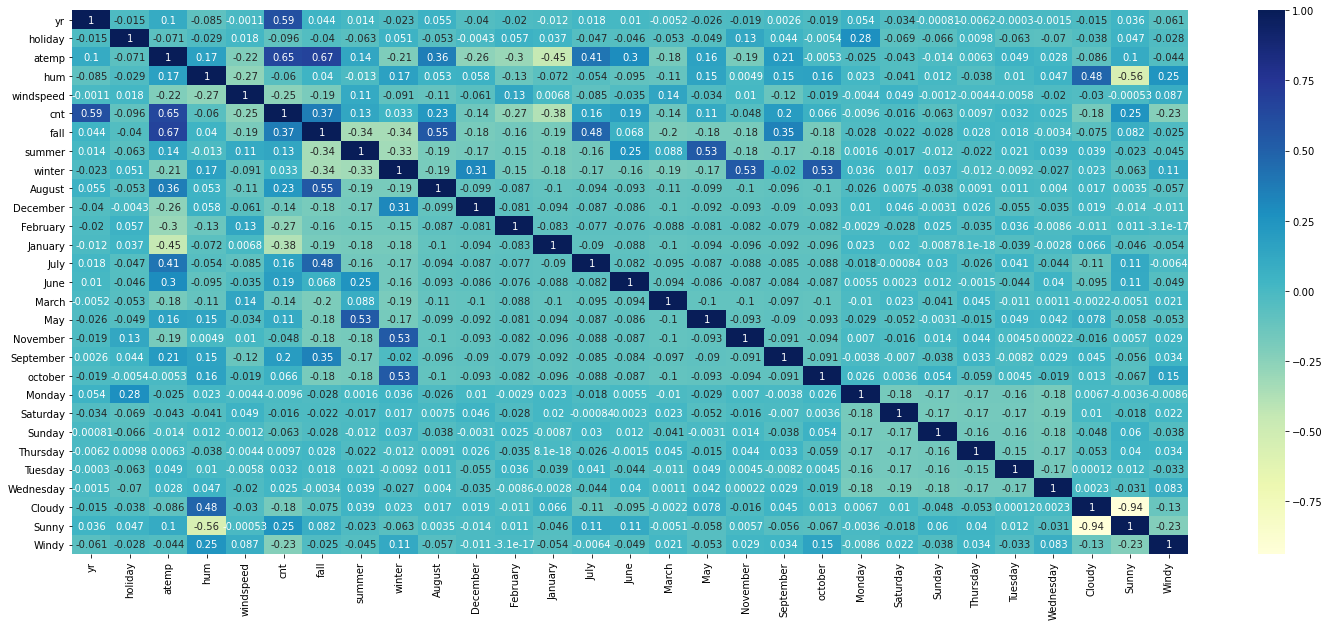

In [63]:
plt.figure(figsize =(25,10))
sns.heatmap(Bike1_Train.corr(),cmap ='YlGnBu',annot = True)
plt.show()            


In [32]:
## Splitting the data 
Bike1_Train.head()
Y_Bike_Train = Bike1_Train.pop('cnt')
X_Bike_Train = Bike1_Train

In [33]:
print(Y_Bike_Train.head())
print(X_Bike_Train.head())

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64
     yr  holiday     atemp       hum  windspeed  fall  summer  winter  August  \
653   1        0  0.501133  0.575354   0.300794     0       0       1       0   
576   1        0  0.766351  0.725633   0.264686     1       0       0       0   
426   1        0  0.438975  0.640189   0.255342     0       0       0       0   
728   1        0  0.200348  0.498067   0.663106     0       0       0       0   
482   1        0  0.391735  0.504508   0.188475     0       1       0       0   

     December  ...  october  Monday  Saturday  Sunday  Thursday  Tuesday  \
653         0  ...        1       0         0       0         0        1   
576         0  ...        0       0         0       0         0        1   
426         0  ...        0       0         1       0         0        0   
728         1  ...        0       0         0       1         0        0   
482         0  ...        0

In [34]:
# Adding constant to X Axis 
###X_Bike_Train.head()
X_Bike_Train_sm = sm.add_constant(X_Bike_Train)
X_Bike_Train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      510 non-null    float64
 1   yr         510 non-null    int64  
 2   holiday    510 non-null    int64  
 3   atemp      510 non-null    float64
 4   hum        510 non-null    float64
 5   windspeed  510 non-null    float64
 6   fall       510 non-null    uint8  
 7   summer     510 non-null    uint8  
 8   winter     510 non-null    uint8  
 9   August     510 non-null    uint8  
 10  December   510 non-null    uint8  
 11  February   510 non-null    uint8  
 12  January    510 non-null    uint8  
 13  July       510 non-null    uint8  
 14  June       510 non-null    uint8  
 15  March      510 non-null    uint8  
 16  May        510 non-null    uint8  
 17  November   510 non-null    uint8  
 18  September  510 non-null    uint8  
 19  october    510 non-null    uint8  
 20  Monday   

In [36]:
lr = sm.OLS(Y_Bike_Train,X_Bike_Train_sm)
lr_model = lr.fit()

In [37]:
lr_model.params

const        0.151515
yr           0.234176
holiday     -0.079818
atemp        0.419497
hum         -0.145605
windspeed   -0.168583
fall         0.055055
summer       0.085874
winter       0.154842
August       0.036894
December    -0.054028
February    -0.040490
January     -0.073420
July        -0.020120
June         0.017822
March       -0.000636
May          0.035849
November    -0.047654
September    0.091471
october      0.007796
Monday      -0.026325
Saturday    -0.004191
Sunday      -0.058887
Thursday    -0.013201
Tuesday     -0.022156
Wednesday   -0.008112
Cloudy       0.093618
Sunny        0.156224
Windy       -0.098327
dtype: float64

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          4.12e-180
Time:                        12:03:28   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1515      0.034      4.489      0.000       0.085       0.218
yr             0.2342      0.008     28.937      0.000       0.218       0.250
holiday       -0.0798      0.027     -2.982      0.003      -0.132      -0.027
atemp          0.4195      0.045      9.248      0.000       0.330       0.509
hum           -0.1456      0.039     -3.758      0.000      -0.222      -0.069
windspeed     -0.1686      0.026     -6.506      0.000      -0.219      -0.118
fall           0.0551      0.030      1.826      0.068      -0.004       0.114
summer         0.0859      0.024      3.614      0.000       0.039       0.133
winter         0.1548      0.026      5.924      0.000       0.103       0.206
August         0.0369      0.033      1.103      0.270      -0.029       0.103
December      -0.0540      0.034     -1.603      0.110      -0.120       0.012
February      -0.0405      0.033     -1.226      0.221      -0.105       0.024
January       -0.0734      0.034     -2.187      0.029      -0.139      -0.007
July          -0.0201      0.035     -0.578      0.563      -0.088       0.048
June           0.0178      0.025      0.726      0.468      -0.030       0.066
March         -0.0006      0.025     -0.026      0.979      -0.049       0.048
May            0.0358      0.021      1.716      0.087      -0.005       0.077
November      -0.0477      0.037     -1.303      0.193      -0.120       0.024
September      0.0915      0.032      2.846      0.005       0.028       0.155
october        0.0078      0.036      0.216      0.829      -0.063       0.079
Monday        -0.0263      0.015     -1.707      0.089      -0.057       0.004
Saturday      -0.0042      0.015     -0.279      0.781      -0.034       0.025
Sunday        -0.0589      0.015     -3.831      0.000      -0.089      -0.029
Thursday      -0.0132      0.016     -0.843      0.399      -0.044       0.018
Tuesday       -0.0222      0.016     -1.418      0.157      -0.053       0.009
Wednesday     -0.0081      0.015     -0.540      0.589      -0.038       0.021
Cloudy         0.0936      0.014      6.884      0.000       0.067       0.120
Sunny          0.1562      0.012     13.172      0.000       0.133       0.180
Windy         -0.0983      0.023     -4.237      0.000      -0.144      -0.053
==============================================================================
Omnibus:                       86.243   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.880
Skew:                          -0.790   Prob(JB):                     8.25e-58
Kurtosis:                       6.142   Cond. No.                     1.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [40]:
###Bike2 = Bike1.drop(['December','February','July','June','March','November','october','Saturday'],axis = 1)
###Bike2_Train = Bike1_Train.drop(['December','February','July','June','March','November','october','Saturday'],axis = 1)

###Y_Bike_Train = Bike1_Train.pop('cnt')
X_Bike_Train = Bike1_Train.drop(['December','Tuesday','February','July','June','March','November','october','Saturday','Wednesday','Thursday'],axis = 1)

In [41]:
###X_Bike_Train.info()

###X_Bike_Train.head()
X_Bike_Train_sm = sm.add_constant(X_Bike_Train)
###X_Bike_Train_sm.info()


In [42]:
lr_1 = sm.OLS(Y_Bike_Train,X_Bike_Train_sm)
lr_model_1 = lr_1.fit()

In [43]:
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.2
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          7.30e-188
Time:                        12:04:43   Log-Likelihood:                 514.23
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     493   BIC:                            -922.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1172      0.025      4.696      0.000       0.068       0.166
yr             0.2327      0.008     28.678      0.000       0.217       0.249
holiday       -0.0886      0.027     -3.342      0.001      -0.141      -0.037
atemp          0.4833      0.035     13.638      0.000       0.414       0.553
hum           -0.1593      0.038     -4.169      0.000      -0.234      -0.084
windspeed     -0.1647      0.026     -6.375      0.000      -0.215      -0.114
fall           0.0423      0.022      1.958      0.051      -0.000       0.085
summer         0.1047      0.016      6.629      0.000       0.074       0.136
winter         0.1476      0.014     10.710      0.000       0.121       0.175
August         0.0514      0.018      2.932      0.004       0.017       0.086
January       -0.0379      0.018     -2.158      0.031      -0.072      -0.003
May            0.0254      0.018      1.447      0.149      -0.009       0.060
September      0.1102      0.017      6.398      0.000       0.076       0.144
Monday        -0.0152      0.012     -1.291      0.197      -0.038       0.008
Sunday        -0.0481      0.012     -4.138      0.000      -0.071      -0.025
Cloudy         0.0802      0.011      7.023      0.000       0.058       0.103
Sunny          0.1396      0.009     15.960      0.000       0.122       0.157
Windy         -0.1026      0.022     -4.683      0.000      -0.146      -0.060
==============================================================================
Omnibus:                       64.744   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.951
Skew:                          -0.605   Prob(JB):                     2.54e-41
Kurtosis:                       5.709   Cond. No.                     5.64e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.61e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_Bike_Train.columns
vif['VIF'] = [variance_inflation_factor(X_Bike_Train.values, i) for i in range(X_Bike_Train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Sunny,31.94
14,Cloudy,23.74
5,fall,5.71
2,atemp,3.58
16,Windy,3.54
6,summer,2.92
7,winter,2.25
3,hum,1.96
8,August,1.69
9,January,1.57


In [46]:
###X_Bike_Train.head()
##X_Bike_Train.info()
X_Bike_Train = X_Bike_Train.drop(['fall','May','Monday'],axis = 1)

In [48]:
X_Bike_Train_sm = sm.add_constant(X_Bike_Train)
##X_Bike_Train_sm.info()
###X_Bike_Train.info()

In [49]:
lr1 = sm.OLS(Y_Bike_Train,X_Bike_Train_sm)
lr_model_1 = lr1.fit()

In [50]:
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.9
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          8.33e-190
Time:                        12:27:11   Log-Likelihood:                 510.64
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     496   BIC:                            -934.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1145      0.025      4.619      0.000       0.066       0.163
yr             0.2305      0.008     28.449      0.000       0.215       0.246
holiday       -0.0992      0.026     -3.873      0.000      -0.149      -0.049
atemp          0.5334      0.026     20.534      0.000       0.482       0.584
hum           -0.1631      0.038     -4.334      0.000      -0.237      -0.089
windspeed     -0.1703      0.026     -6.595      0.000      -0.221      -0.120
summer         0.0926      0.011      8.200      0.000       0.070       0.115
winter         0.1321      0.012     11.453      0.000       0.109       0.155
August         0.0639      0.016      3.962      0.000       0.032       0.096
January       -0.0411      0.018     -2.346      0.019      -0.075      -0.007
September      0.1211      0.016      7.484      0.000       0.089       0.153
Sunday        -0.0455      0.012     -3.952      0.000      -0.068      -0.023
Cloudy         0.0791      0.011      6.911      0.000       0.057       0.102
Sunny          0.1373      0.009     15.717      0.000       0.120       0.155
Windy         -0.1020      0.022     -4.676      0.000      -0.145      -0.059
==============================================================================
Omnibus:                       54.856   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.867
Skew:                          -0.526   Prob(JB):                     4.72e-33
Kurtosis:                       5.429   Cond. No.                     1.71e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
X_Bike_Train.head()

,yr,holiday,atemp,hum,windspeed,summer,winter,August,January,September,Sunday,Cloudy,Sunny,Windy
653,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,1,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0
426,1,0,0.438975,0.640189,0.255342,0,0,0,0,0,0,1,0,0
728,1,0,0.200348,0.498067,0.663106,0,0,0,0,0,1,0,1,0
482,1,0,0.391735,0.504508,0.188475,1,0,0,0,0,0,1,0,0


In [52]:
vif = pd.DataFrame()
vif['Features'] = X_Bike_Train.columns
vif['VIF'] = [variance_inflation_factor(X_Bike_Train.values, i) for i in range(X_Bike_Train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Sunny,31.31
11,Cloudy,23.34
13,Windy,3.46
2,atemp,1.91
3,hum,1.89
6,winter,1.56
8,January,1.55
5,summer,1.48
7,August,1.42
9,September,1.22


# Model 


In [53]:
print(lr_model_1)

In [55]:
lr_model_1.params

const        0.114492
yr           0.230492
holiday     -0.099170
atemp        0.533449
hum         -0.163101
windspeed   -0.170328
summer       0.092646
winter       0.132075
August       0.063873
January     -0.041061
September    0.121123
Sunday      -0.045479
Cloudy       0.079107
Sunny        0.137343
Windy       -0.101958
dtype: float64

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.95e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
###Linear Regression formula Cont = const (0.114) + yr * 0.23+holiday* -0.09+atemp* 0.53+hum*-0.16+windspeed* -0.17+summer       *0.09+ winter*0.13+August*0.06+January*-0.04+September* 0.12+Sunday*-0.04+Cloudy* 0.08+Sunny        *0.14+Windy*-0.10)

In [56]:
###Blank

In [57]:
###Blank

In [58]:
###Blank

In [59]:
###Blank

In [60]:
###Blank

###Linear Regression formula  Cont = )10.05 + const*0.1 +yr*0.23 +holiday*-0.1 +atemp*0.48 +hum*-0.15 +windspeed*-0.16
fall*0.08 + summer*0.12+ winter*0.16 +December*-0.02+November*-0.02 +September*0.09 +october*0.03 +Sunday*-0.05+
Cloudy*0.08 +Sunny*0.14 +Windy*-0.12)


### residual Analysis of data

In [61]:
Y_Bike_Train_Pred = lr_model_1.predict(X_Bike_Train_sm)
res = (Y_Bike_Train-Y_Bike_Train_Pred)

Text(0.5, 1.0, ' Residual Plot')

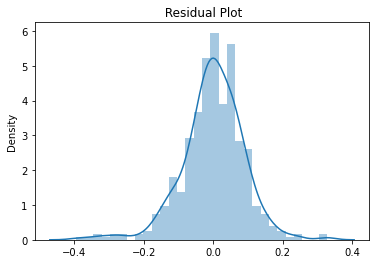

In [62]:
fig = plt.figure()
sns.distplot(res)
plt.title(" Residual Plot")

In [ ]:
## Residual Analysis and Error terms
## We can infer Error terms are normally distributed
## Additionally error terms are independent and constant 

In [63]:
##Bike1_test.head()
num_vars = ['atemp','hum','windspeed','cnt']
Bike1_test[num_vars] = scaler.transform(Bike1_test[num_vars])


In [64]:
Bike1_test.head()

,yr,holiday,atemp,hum,windspeed,cnt,fall,summer,winter,August,...,october,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Sunny,Windy
184,0,1,0.769660,0.657364,0.084219,0.692706,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
535,1,0,0.842587,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
299,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
221,0,0,0.795343,0.437098,0.339570,0.547400,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
152,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [65]:
y_Bike1_test = Bike1_test.pop('cnt')
X_Bike1_test = Bike1_test

In [67]:
X_Bike1_test_sm1 = sm.add_constant(X_Bike1_test)
##X_Bike1_test_sm1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      219 non-null    float64
 1   yr         219 non-null    int64  
 2   holiday    219 non-null    int64  
 3   atemp      219 non-null    float64
 4   hum        219 non-null    float64
 5   windspeed  219 non-null    float64
 6   fall       219 non-null    uint8  
 7   summer     219 non-null    uint8  
 8   winter     219 non-null    uint8  
 9   August     219 non-null    uint8  
 10  December   219 non-null    uint8  
 11  February   219 non-null    uint8  
 12  January    219 non-null    uint8  
 13  July       219 non-null    uint8  
 14  June       219 non-null    uint8  
 15  March      219 non-null    uint8  
 16  May        219 non-null    uint8  
 17  November   219 non-null    uint8  
 18  September  219 non-null    uint8  
 19  october    219 non-null    uint8  
 20  Monday   

In [69]:
X_Bike1_test_sm1 = X_Bike1_test_sm1.drop(['fall','December','February','July','June','March','May','November','october','Monday','Saturday','Thursday','Tuesday','Wednesday'], axis = 1)

In [70]:
X_Bike1_test_sm1.head()
###X_Bike1_test_sm1 = X_Bike1_test_sm1.drop([]

,const,yr,holiday,atemp,hum,windspeed,summer,winter,August,January,September,Sunday,Cloudy,Sunny,Windy
184,1.0,0,1,0.769660,0.657364,0.084219,0,0,0,0,0,0,1,0,0
535,1.0,1,0,0.842587,0.610133,0.153728,1,0,0,0,0,0,0,1,0
299,1.0,0,0,0.496145,0.837699,0.334206,0,1,0,0,0,0,1,0,0
221,1.0,0,0,0.795343,0.437098,0.339570,0,0,1,0,0,0,0,1,0
152,1.0,0,0,0.741471,0.314298,0.537414,1,0,0,0,0,0,0,1,0


# making the Prediction using  Pre model on test set

In [71]:
y_Bike1_test_pred = lr_model_1.predict(X_Bike1_test_sm1)

Text(0, 0.5, 'y_pred')

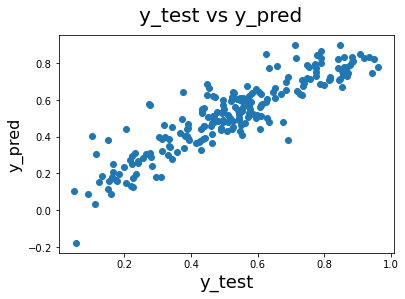

In [72]:
### Model evaluation
fig = plt.figure()
plt.scatter(y_Bike1_test,y_Bike1_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [80]:
###lr1 = sm.OLS(Y_Bike_Train,X_Bike_Train_sm)
lr_x1 = sm.OLS(y_Bike1_test,X_Bike1_test_sm1)
lr_model_2 = lr_x1.fit()

In [81]:
print(lr_model_1.params)
print(lr_model_2.params)

const        0.114492
yr           0.230492
holiday     -0.099170
atemp        0.533449
hum         -0.163101
windspeed   -0.170328
summer       0.092646
winter       0.132075
August       0.063873
January     -0.041061
September    0.121123
Sunday      -0.045479
Cloudy       0.079107
Sunny        0.137343
Windy       -0.101958
dtype: float64
const        0.130235
yr           0.227776
holiday     -0.063496
atemp        0.606230
hum         -0.261726
windspeed   -0.080552
summer       0.091493
winter       0.152981
August       0.033982
January     -0.011515
September    0.111020
Sunday      -0.028320
Cloudy       0.072302
Sunny        0.098368
Windy       -0.040435
dtype: float64


In [82]:
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     73.00
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.96e-69
Time:                        13:00:29   Log-Likelihood:                 212.12
No. Observations:                 219   AIC:                            -396.2
Df Residuals:                     205   BIC:                            -348.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1302      0.045      2.915      0.004       0.042       0.218
yr             0.2278      0.013     16.931      0.000       0.201       0.254
holiday       -0.0635      0.035     -1.833      0.068      -0.132       0.005
atemp          0.6062      0.037     16.223      0.000       0.533       0.680
hum           -0.2617      0.065     -4.008      0.000      -0.390      -0.133
windspeed     -0.0806      0.046     -1.760      0.080      -0.171       0.010
summer         0.0915      0.017      5.318      0.000       0.058       0.125
winter         0.1530      0.018      8.564      0.000       0.118       0.188
August         0.0340      0.031      1.109      0.269      -0.026       0.094
January       -0.0115      0.028     -0.408      0.684      -0.067       0.044
September      0.1110      0.026      4.352      0.000       0.061       0.161
Sunday        -0.0283      0.019     -1.515      0.131      -0.065       0.009
Cloudy         0.0723      0.019      3.833      0.000       0.035       0.109
Sunny          0.0984      0.014      6.852      0.000       0.070       0.127
Windy         -0.0404      0.040     -1.001      0.318      -0.120       0.039
==============================================================================
Omnibus:                       18.622   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.485
Skew:                          -0.626   Prob(JB):                     1.31e-05
Kurtosis:                       3.948   Cond. No.                     2.29e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
## Use of SK Learn to predict the R2 Values and Compare with Predicted Values
lm = LinearRegression()
lm.fit(X_Bike_Train_sm,Y_Bike_Train)

LinearRegression()

In [84]:
print(lm.intercept_)
print(lm.coef_)

0.1526560489139076
[ 0.          0.23049228 -0.09917024  0.53344876 -0.16310085 -0.17032771
  0.09264551  0.1320747   0.06387305 -0.0410609   0.12112283 -0.0454793
  0.04094305  0.0991791  -0.14012216]


In [85]:
###r3_A = r2_score(y_true = y_train_lm, y_pred = y_train_pred)  ## training set
###r2_A = r2_score(y_true = y_test_lm, y_pred = y_test_pred) ## test set

r2 = r2_score(y_true = y_Bike1_test, y_pred = y_Bike1_test_pred)
r3 = r2_score(y_true = Y_Bike_Train, y_pred = Y_Bike_Train_Pred)
print(r2)
print(r3)

0.8071682333287319
0.8429962580374643


In [87]:
print ("R - Squared value train :",round(lr_model_1.rsquared,2),"R-Squared Adjusted train : ", round(lr_model_1.rsquared_adj,3))
print ("R - Squared value test :" ,round(lr_model_2.rsquared,2),"R-Squared Adjusted test : ", round(lr_model_2.rsquared_adj,3))
print ("Cofficient of variables :")
print (round(lr_model_1.params,2))

R - Squared value train : 0.84 R-Squared Adjusted train :  0.839
R - Squared value test : 0.82 R-Squared Adjusted test :  0.811
Cofficient of variables :
const        0.11
yr           0.23
holiday     -0.10
atemp        0.53
hum         -0.16
windspeed   -0.17
summer       0.09
winter       0.13
August       0.06
January     -0.04
September    0.12
Sunday      -0.05
Cloudy       0.08
Sunny        0.14
Windy       -0.10
dtype: float64


# Final Model 
###Linear Regression formula Cont = (10.05 + const (0.11) + yr * 0.23 + holiday * -0.10+ atemp * 0.53 + hum* -0.16+ windspeed*-0.17+summer * 0.09+winter * 0.13+August*0.06+ January* -0.04 + September* 0.12+ Sunday *-0.05 +Cloudy * 0.08+ Sunny * 0.14 + Windy * -0.10)